# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

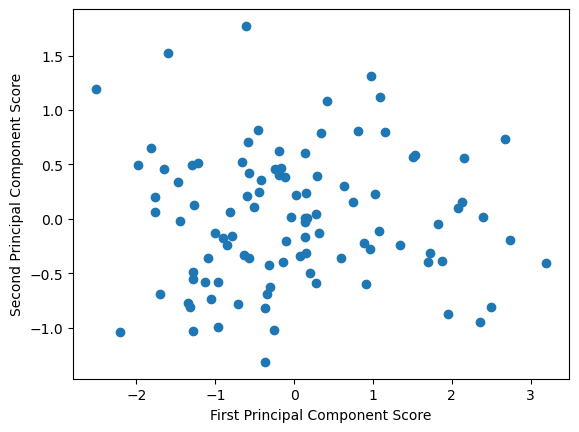

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

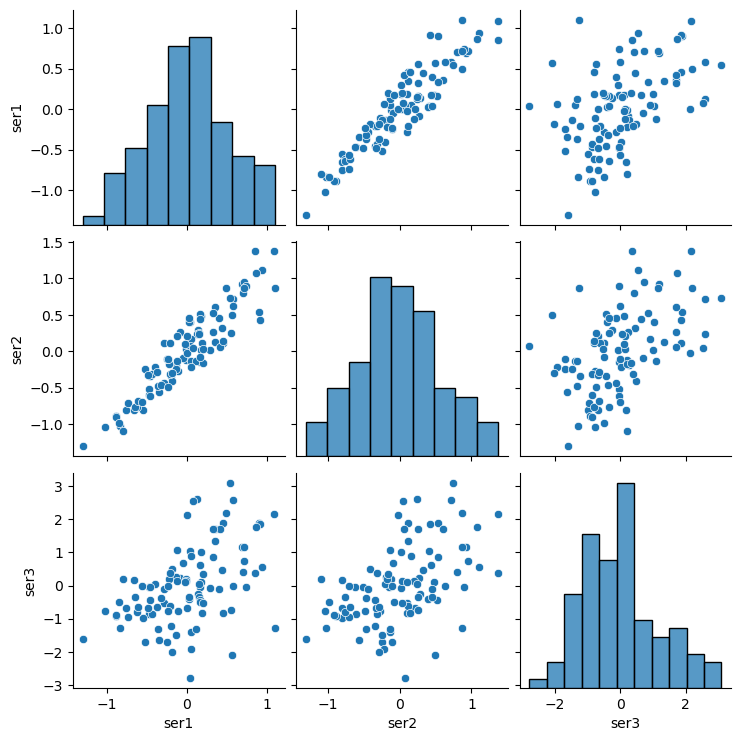

In [2]:
# making the pairplot

import seaborn as sns

sns.pairplot(df)
plt.show()

The outliers in the upper left corner reflects the low value on PC1 and the high value on PC2. The ourliers have high series_1 and series_2 while having a low series_3. We can say more about series_3 than the two because PC1 exaplins almost 80% of the variance and is almost all of series_3. Also, series_1 and series_2 are high correlated and seem to have similar weights, because of that it makes it hard to distinguish what exaclty is effecting the PCA.

The overall advantages of the scatterplot captures most of the variance in the pc1 and pc2, it shows the outliers, and it shows the patterns in the relationship between all 3 series. 

The overall disadvantages are its hard to interpect which original features make the most affect and the original variables beomce mixed making it even harder to tell.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

In [3]:
file_path = "C:/Users/marti/OneDrive/Boston University Classes/Mob B DX699_02 sem 2/Week 9 - Multivariate Analysis 2/diabetes_binary_health_indicators_BRFSS2015.csv"

df = pd.read_csv(file_path)

In [4]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


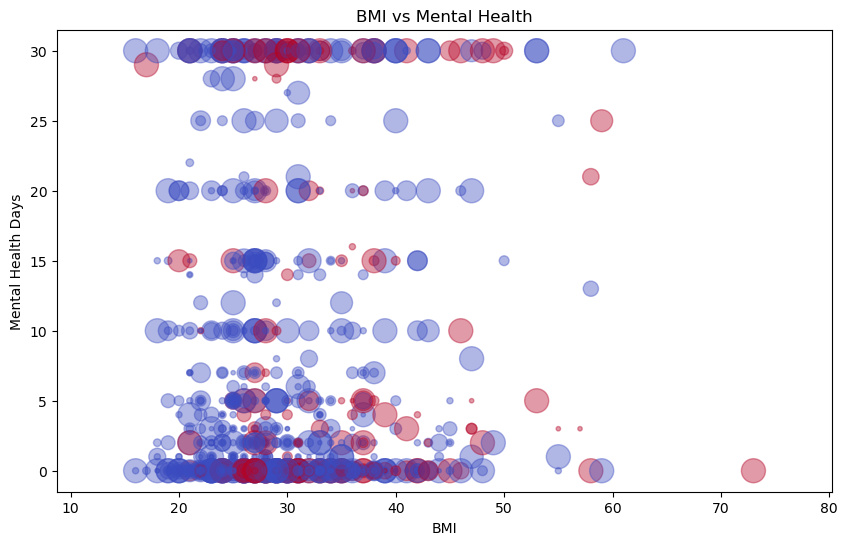

In [5]:
df_sample = df.sample(3000, random_state=42) # make the plot less cluttered

plt.figure(figsize=(10,6))
plt.scatter(data = df_sample, x="BMI", y="MentHlth", sizes=df_sample["PhysHlth"]*10, c="Diabetes_binary", cmap="coolwarm",alpha=0.4)
plt.xlabel("BMI")
plt.ylabel("Mental Health Days")
plt.title("BMI vs Mental Health")
plt.show()


C:\Users\marti\AppData\Local\Temp\ipykernel_52768\518349441.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(


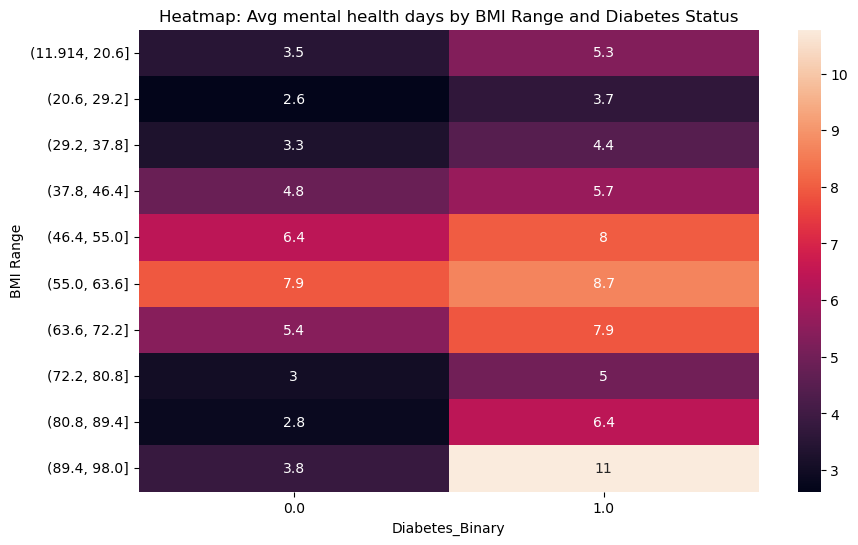

In [6]:

pivot_table = df.pivot_table(
    index=pd.cut(df["BMI"], bins=10),
    columns="Diabetes_binary",
    values="MentHlth",
    aggfunc="mean"
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True)
plt.title("Heatmap: Avg mental health days by BMI Range and Diabetes Status")
plt.xlabel("Diabetes_Binary")
plt.ylabel("BMI Range")
plt.show()

In [7]:
X = df.drop(columns=["Diabetes_binary"])

pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.48271061, 0.22030817])

The pca variance 48.27% means almost half of all variability in the dataset is captured along this one axis. While the 22.03% adds another to the sturcture. In the end 70.30% is captured, indicationg the original 20+ variables can be represented in a lower dimensional space (2D or 3D) without losing too much of its information.

In [8]:
from sklearn import linear_model
from sklearn import metrics

LR = linear_model.LinearRegression()

X = df[["Income", "PhysActivity"]]
y = df["Age"]

LR.fit(X,y)
pred = LR.predict(X)

mse = metrics.mean_squared_error(y, pred)
rmse = metrics.root_mean_squared_error(y, pred)

print(f"Mean Squarred Error: {mse:.4f}")
print(f"Root Mean Squarred Error: {rmse:.4f}")

Mean Squarred Error: 9.1322
Root Mean Squarred Error: 3.0219


From the linear regression we are able to evalute the model using the MSE. This shows the difference between the models predicted values and the actual observed values. With a RMSE of 3 meaning the average error is 3 years. The model can incorreclty predict the age of an individual by 3 years.

# 4. Storytelling With Data plot

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

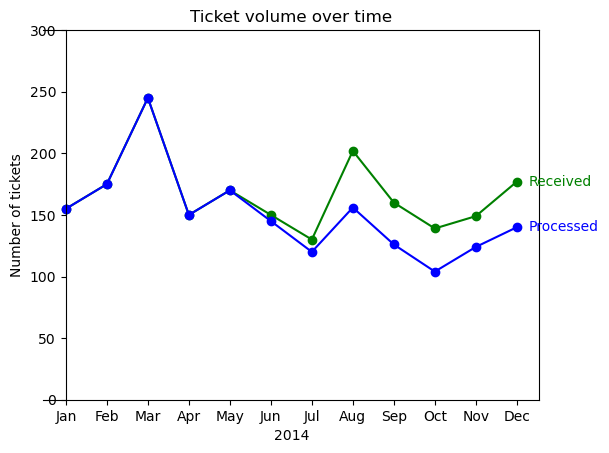

In [10]:
# page 144 
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

Received = [155, 175, 245, 150, 170, 150, 130, 202, 160, 139, 149, 177]
Processed = [155, 175, 245, 150, 170, 145, 120, 156, 126, 104, 124, 140]

x_position = list(range(len(months)))

plt.plot(x_position, Received, marker="o", color="green")
plt.plot(x_position, Processed, marker="o", color="Blue")

plt.text(x_position[-1] + 0.3, Received[-1], "Received", color="green", va="center")
plt.text(x_position[-1] + 0.3, Processed[-1], "Processed", color="blue", va="center")

plt.xticks(ticks=x_position,
                      labels=months)
plt.ylim(0,300)
plt.yticks(range(0,301,50))
plt.xlabel(2014)
plt.ylabel("Number of tickets")
plt.title("Ticket volume over time")

plt.gca().spines["left"].set_position(("data", 0))

plt.show()